# Abstract 

La posibilidad que brindan los sistemas automatizados de decision y clasificacion son sobresalientes al producir mejoras de producto y reducir costos o aumentar ganacias, de manera sistematica y eficaz. Muchas empresas relacionadas al juego y apuestas utilizan esto para predecir numeros ante la gran cantidad de datos que se nos brinda dados en el dataset. Asi mismo , el cliente propone una solucion practica ante las circunstacias economicas que atraviesa.

En base a esta informacion , se puede hacer una investigacion y resolver las practicas beneficiosas de los jugadores y del equipo en cada uno de los juegos, es decir , es posible hacer preguntas y responderlas para obtener nuevos conocimientos sobre los equipos, los jugadores y la competencia en sí. Por ejemplo, se puede analizar la tendencia de los equipos en casa y fuera de casa, las estadísticas de los jugadores en diferentes momentos del partido, o el porcentaje de victorias y derrotas de los equipos.

Este proyecto se basara en utilizar los datos disponibles para encontrar las diferencias y probrabilidades en cada partido dado durante los años jugados por la NBA. El objetivo se centrara en poder adquirir una variable que determine un numero en el cual se basara la cuota cobrada por el sistema de apuestas. Ademas , este analisis proovera al cliente con el gran beneficio del conocimiento y la ventaja por sobre la competencia , o hacia los mismos usuarios de la plataforma.

Asi, lo visto durante un analisis exploratorio de los datos y las caracteristicas del conjunto , se plantearan las primeras hipotesis para luego establecer un modelo predictivo de los datos de interes. Luego de un resultado final , se podra verificar el uso de las herramientas y las capacidades un sistema de ML.

# Entrenando un algoritmo de Machine Learning (Segunda parte)

## Feature Selection: Análisis de Componentes Principales (PCA)

El método de Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica comúnmente utilizada para reducir la dimensionalidad de los datos mediante la identificación de las variables que explican la mayor cantidad de variabilidad en el conjunto de datos. En el caso del dataset de la NBA, que contiene información sobre múltiples variables estadísticas de los partidos, puede ser útil aplicar PCA para reducir la dimensión del conjunto de datos y facilitar el análisis y la visualización de los patrones de datos. Al utilizar PCA, se pueden identificar las variables más importantes para explicar la variabilidad en los datos y reducir la complejidad del modelo, lo que puede llevar a una mayor eficiencia computacional y una mejor interpretación de los resultados. Además, el PCA puede ser una herramienta útil para la detección de patrones y relaciones no evidentes en los datos.

In [36]:
print(df.columns)

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON',
       'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'PTS_diff', 'Location'],
      dtype='object')


In [37]:
from sklearn.decomposition import PCA

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Creamos PCA con dos componentes principales
pca_selector = PCA(n_components=2)
# Ajustamos
pca = pca_selector.fit(df_features_normalized)
# Obtenemos las componentes principales
components = pca.components_

feature_names = df_features.columns

# Iterar sobre las componentes
for i, component in enumerate(components):
    # Ordenar los índices de los pesos de mayor a menor
    sorted_indices = np.argsort(-component)
    
    # Mostrar el nombre de la componente
    print(f"Componente {i+1}:")
    
    # Iterar sobre los índices ordenados y mostrar los nombres de las variables y sus pesos
    for j in sorted_indices:
        print(f"{feature_names[j]}: {component[j]}") 

Componente 1:
PTS_home: 0.4246984793777951
PTS_away: 0.4141079409609243
FG_PCT_home: 0.3602342221084838
FG_PCT_away: 0.35176025455925924
AST_home: 0.32386132738008955
AST_away: 0.31527616659014773
FG3_PCT_home: 0.25301384863234766
FG3_PCT_away: 0.24194000267521384
FT_PCT_away: 0.09356816730913646
FT_PCT_home: 0.09152046239870117
REB_away: -0.15627545638566548
REB_home: -0.1620266492135642
Componente 2:
FG_PCT_home: 0.390610986059039
AST_home: 0.32997523917627747
FG3_PCT_home: 0.32043562773336015
PTS_home: 0.2847529580663803
REB_home: 0.2204403545835971
FT_PCT_home: 0.021750055765112002
FT_PCT_away: -0.052086307827379955
REB_away: -0.21876209728224433
PTS_away: -0.31023260667250996
FG3_PCT_away: -0.3123170819682152
AST_away: -0.3203112734115566
FG_PCT_away: -0.39843916112812383


El primer vector indica que la variable con mas peso de la componente 1 es PTS_home, seguida por PTS_away y FG_PCT_home.
El segundo vector indica que la variable con mas peso de la componente 2 es FG_PCT_home, seguida por FG_PCT_away y AST_home.

Asi, podemos establecer que las mejores variables para el entrenamiento del modelo son **"PTS_home" "AST_home" "FG_PCT_away" "PTS_away" "FG_PCT_home"** , por su variabilidad y correlacion

## Feature Selection: Recursive Feature Elimination

La eliminación recursiva de características (Recursive Feature Elimination o RFE) es un método utilizado en aprendizaje automático para seleccionar las características (o variables) más importantes en un conjunto de datos.
El proceso comienza entrenando un modelo con todas las características disponibles, luego se evalúa la importancia de cada una de las características. En función de estas evaluaciones, se eliminan las características menos importantes y se vuelve a entrenar el modelo con el conjunto reducido de características.
Este proceso se repite iterativamente, eliminando las características menos importantes en cada iteración hasta que se alcanza el número deseado de características o hasta que no se pueden eliminar más características sin afectar significativamente el rendimiento del modelo.

In [38]:
from  sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Normalizamos los datos de la variable target
target_normalized = (df['HOME_TEAM_WINS'] - df['HOME_TEAM_WINS'].mean()) / df['HOME_TEAM_WINS'].std()
# Denominamos las variables para el entrenamiento y el test
X = df_features_normalized
y = target_normalized
# Se le asigna un estimador como parametro al modelo
estimator = LinearRegression()
# Se le proporciona parametros al modelo
selector_rfe = RFE(estimator, n_features_to_select=None)
# Se entrena el modelo y se almacena el 
rfe = selector_rfe.fit(X, y)
# Se obtienen los indices de las variables relevantes
print(selector_rfe.feature_names_in_)
print(selector_rfe.support_)

['PTS_home' 'FG_PCT_home' 'FT_PCT_home' 'FG3_PCT_home' 'AST_home'
 'REB_home' 'PTS_away' 'FG_PCT_away' 'FT_PCT_away' 'FG3_PCT_away'
 'AST_away' 'REB_away']
[ True  True False False  True False  True  True False False  True False]


A diferencia de otros algoritmos , al usar el RFE sera necesaria la iteracion para ir reduciendo la dimension del dataset hasta alcanzar la cantidad de variables de interes, en este caso se hara solo una iteracion nueva:

In [39]:
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array = np.array(selector_rfe.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_rfe= filtered_features_array[selector_rfe.support_]
selected_features_rfe

array(['PTS_home', 'FG_PCT_home', 'AST_home', 'PTS_away', 'FG_PCT_away',
       'AST_away'], dtype=object)

In [40]:
# Se realiza una nueva iteracion con los datos de la iteracion anterior y se establecen como variable
filtered_features = selected_features_rfe.tolist()
X = df_features_normalized[filtered_features]
y = target_normalized
# Se le asigna un estimador como parametro al modelo
estimator = LinearRegression()
# Se le proporciona parametros al modelo
selector_rfe = RFE(estimator, n_features_to_select=None)
# Se entrena el modelo y se almacena el 
rfe = selector_rfe.fit(X, y)
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array = np.array(selector_rfe.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_rfe= filtered_features_array[selector_rfe.support_]
selected_features_rfe = selected_features_rfe.tolist()
selected_features_rfe

['PTS_home', 'AST_home', 'PTS_away']

Asi se puede concluir que el algoritmo de *"feature selection"* considera como caracteristicas pricipales a **'FG_PCT_home', 'PTS_away', 'FG_PCT_away'** , estableciendo una distinta importancia a las caracteristicas. Sin embargo , poseer baja cantidad de variables puede llevar a predicciones no fiables o de baja precision por la baja variabilidad de los datos , a pesar que en este dataset se poseen un bajo numero de datos y no se pueda verificar este problema.

# Feature selection: SelectKBest

El método SelectKBest es una técnica de selección de características que se utiliza para seleccionar las k características más importantes de un conjunto de datos utilizando un método de puntuación estadística. Es una técnica de selección de características univariante, lo que significa que cada característica se evalúa de forma independiente de las demás características.

SelectKBest utiliza una variedad de pruebas estadísticas, como ANOVA F-test, prueba chi-cuadrado, prueba mutual information, entre otras, para evaluar la relación entre cada característica y la variable objetivo. Luego, selecciona las k características con los puntajes más altos.

Se utilizara la prueba "ANOVA F-test" para hacer la seleccion de variables:

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Normalizamos los datos de la variable target
target_normalized = (df['HOME_TEAM_WINS'] - df['HOME_TEAM_WINS'].mean()) / df['HOME_TEAM_WINS'].std()
# Denominamos las variables para el entrenamiento y el test
X = df_features_normalized
y = target_normalized

# Seleccionamos las características más importantes utilizando f_classif
selector_skb = SelectKBest(f_classif, k=4)
skb = selector_skb.fit_transform(X, y)

# Imprimimos las características seleccionadas
print(selector_skb.feature_names_in_)
print(selector_skb.get_support())

['PTS_home' 'FG_PCT_home' 'FT_PCT_home' 'FG3_PCT_home' 'AST_home'
 'REB_home' 'PTS_away' 'FG_PCT_away' 'FT_PCT_away' 'FG3_PCT_away'
 'AST_away' 'REB_away']
[ True  True False False False False  True  True False False False False]


In [42]:
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array_skb = np.array(selector_skb.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_skb = filtered_features_array_skb[selector_skb.get_support()]
selected_features_skb = selected_features_skb.tolist()
selected_features_skb

['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away']

Al poner como objetivo 4 caracteristicas de interes, se puede concluir que el algoritmo de *"feature selection"* considera como caracteristicas pricipales a **'PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away'** , que termina similar a la seleccion con el RFE

# Entrenamiento de Modelo (LogisticRegression basado en PCA)

Se utilizará un algoritmo de regresión lineal para entrenar un modelo utilizando los distintos metodos de feature selectionEl modelo se ajusta a los datos de entrenamiento y se utiliza para hacer predicciones sobre los datos de prueba. Se utiliza el coeficiente de determinación R2 para evaluar el rendimiento del modelo, que indica cuánta varianza en la variable objetivo es explicada por el modelo. Si el valor de R2 es cercano a 1, significa que el modelo se ajusta bien a los datos y es capaz de hacer buenas predicciones.
**Para la ejecucion de esta parte del codigo sera necesaria la ejecucion previa de la reduccion de dimension del metodo PCA**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Se establecen las variables  de entrada 
X = df[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']]
y = df['HOME_TEAM_WINS']
# Se aplica PCA para reducir la dimensionalidad de los datos
pca_c = PCA(n_components=2)
# Se aplica el algoritmo de PCA al conjunto de datos
X_pca = pca_c.fit_transform(X)
pca = LogisticRegression()
# Se dividen los datos para entrenar y testear el modelo
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
pca.fit(X_train_pca, y_train_pca)
# Se evalua la exactitud del modelo
score_pca = pca.score(X_test_pca, y_test_pca)
y_pred_pca = pca.predict(X_test_pca)
print("Exactitud del modelo usando seleccion de PCA:", score_pca)

Exactitud del modelo usando seleccion de PCA: 0.9840466926070038


In [44]:
X_pca

array([[ -9.49438213,  -8.44016439],
       [  8.36335215,   4.58250243],
       [-17.25404451,  -8.85883308],
       ...,
       [  6.28112153,   2.05303995],
       [  7.52699159,   1.38816997],
       [ 14.34610284, -10.69812235]])

Nos da un valor alrededor de 1, significa que el modelo clasifica correctamente todas las instancias del conjunto de datos de prueba. Esto podría ser un indicador de que el modelo está sobreajustando (overfitting) el conjunto de datos de entrenamiento, es decir, el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien para nuevos datos.

# Entrenamiento de Modelo (LogisticRegression basado en RFE)

**Para la ejecucion de esta parte del codigo sera necesaria la ejecucion previa de la reduccion de dimension del metodo RFE**

In [45]:
X = df[selected_features_rfe]
Y = df['HOME_TEAM_WINS']
# Se dividen los datos para entrenar y testear el modelo
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, Y, test_size=0.3, random_state=42)
# Se le proporciona parametros al modelo
logreg_rfe = LogisticRegression()
# Se entrena el modelo y se almacena el 
rfe = logreg_rfe.fit(X_train_rfe, y_train_rfe)
score_rfe = rfe.score(X_test_rfe,y_test_rfe)
y_pred_rfe = rfe.predict(X_test_rfe)
print("Exactitud del modelo usando seleccion de RFE:", score_rfe)

Exactitud del modelo usando seleccion de RFE: 1.0


# Entrenamiento de Modelo (LogisticRegression basado en SelectKBest)

**Para la ejecucion de esta parte del codigo sera necesaria la ejecucion previa de la reduccion de dimension del metodo SelectKBest**

In [46]:
X = df[selected_features_skb]
Y = df['HOME_TEAM_WINS']
# Se dividen los datos para entrenar y testear el modelo
X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X, Y, test_size=0.3, random_state=42)
logreg_skb = LogisticRegression()
skb = logreg_skb.fit(X_train_skb, y_train_skb)
score_skb = logreg_skb.score(X_test_skb, y_test_skb)
y_pred_skb = skb.predict(X_test_skb)
print("Exactitud del modelo usando seleccion de SekectKBest:", score_skb)

Exactitud del modelo usando seleccion de SekectKBest: 1.0


# Validación del modelo para los distintos feature selection

## PCA

En resumen , luego de completar los modelos y mostrar un puntaje de relacion entre la prediccion y los datos de validacion , se ve que:

In [47]:
#PCA
print("PCA:")
print("Caracteristicas: ['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']")
print("Exactitud (accuracy): "+str(score_pca))
#RFE
print("RFE:")
print("Caracteristicas: "+str(selected_features_rfe))
print("Exactitud (accuracy): "+str(score_rfe))
#SelectKBest
print("SelectKBest:")
print("Caracteristicas: "+str(selected_features_skb))
print("Exactitud (accuracy): "+str(score_skb))

PCA:
Caracteristicas: ['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']
Exactitud (accuracy): 0.9840466926070038
RFE:
Caracteristicas: ['PTS_home', 'AST_home', 'PTS_away']
Exactitud (accuracy): 1.0
SelectKBest:
Caracteristicas: ['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away']
Exactitud (accuracy): 1.0


Para concluir la seccion de validacion de modelos , haremos una matriz de confusion que represente los FP que los modelos pueden tener

In [48]:
# Se realiza una matriz de confusión para el modelo de regresión logística
from sklearn import metrics
cm_pca = metrics.confusion_matrix(y_test_pca, y_pred_pca)
print('PCA')
print(cm_pca)

cm_rfe = metrics.confusion_matrix(y_test_rfe, y_pred_rfe)
print('RFE')
print(cm_rfe)

cm_skb = metrics.confusion_matrix(y_test_skb, y_pred_skb)
print('SKB')
print(cm_skb)

PCA
[[3049   59]
 [  64 4538]]
RFE
[[3108    0]
 [   0 4602]]
SKB
[[3108    0]
 [   0 4602]]


Todas las métricas de este modelo estan dando un valor casi de 1. esto podría ser una señal de que el modelo se está sobreajustando a los datos de entrenamiento y no está generalizando bien para nuevos datos. Esto significa que el modelo se está adaptando demasiado bien a los datos específicos de entrenamiento y está perdiendo la capacidad de generalizar para nuevos datos que no ha visto antes. Como resultado, es posible que el modelo no sea capaz de hacer predicciones precisas para nuevos datos y podría requerir ajustes para mejorar su capacidad de generalización. Por otro lado, también cabe la posibilidad de que el modelo esté sobreajustado porque la cantidad de datos es muy pequeña. 

Tambien se puede ver que la matriz de confusion demuestra valores de error (falsos) relativamente bajos , que puede asociarse a lo anteriormente explicado.

# Aplicacion del modelo entrenado a nuevas situaciones

A partir de ahora podemos utilizar el modelo logistico entrenado para realizar predicciones de ganar siendo de local y dandole las variables necesarias para predecir. Cada modelo entrenado tendra una diferencia en la prediccion , ya que utilizan distintas variables y por lo tanto , basaran las desiciones segun las variables informadas.

Para encontrar el caso (o los casos) mas adecuados , procederemos a armar un data frame con los datos que dan como resultado de los modelos para poder compararlos a final del proyecto y evaluar cual seria la mejor opcion de utilizar estos resultados. 

Asi , las variables utilizadas en el modelo realizado en base al PCA, serian:

    'PTS_home'
    'FG_PCT_home'
    'PTS_away'
    'FG_PCT_away'
    'AST_home'

En el caso del modelo de RFE , serian:

    'PTS_home'
    'AST_home'
    'PTS_away'

En el caso del modelo de SKB , serian:

    'PTS_home'
    'FG_PCT_home'
    'PTS_away'
    'FG_PCT_away'

Se debe explicar , que estas variables son independientes al partido y no se pueden predecir simplemente. Es decir , que sera necesario visualizar parte del partido para conocer su resultado final.Una manera de aplicacion seria utilizarlo en el partido para conseguir datos en tiempo real

In [49]:
#Creamos el dataframe que comparara los resultados de los modelos
comparison_df=pd.DataFrame(columns=['Minutes','PCA_win','PCA_lose','RFE_win','RFE_lose','SKB_win','SKB_lose'])
comparison_df['Minutes']=[6, 12, 18, 24, 30 , 36 , 42 , 48]
#Cargando los datos de un partido de ejemplo en el que gana el local
new_game_df_home=pd.read_csv('D:/Documents/GitHub/NBA_games_analitycs/notebooks/Borrador/Libro1.csv', sep=';')
datos_partido_home_pca=new_game_df_home[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']]
print('Gana Local\n'+str(datos_partido_home_pca))
print(' ')
#Cargando los datos de un partido de ejemplo en el que gana el visitante
new_game_df_away=pd.read_csv('D:/Documents/GitHub/NBA_games_analitycs/notebooks/Borrador/Libro2.csv', sep=';')
datos_partido_away_pca=new_game_df_away[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']]
print('Gana Visitante\n'+str(datos_partido_away_pca))

Gana Local
    PTS_home  FG_PCT_home  PTS_away  FG_PCT_away  AST_home
0          0     0.000000         0     0.000000         0
1          2     0.000000         3     0.000000         0
2          4     0.000000         5     0.000000         0
3          6     0.000000         6     0.000000         0
4          9     0.500000         7     0.000000         1
5         12     0.750000         9     0.000000         3
6         15     0.750000        12     0.000000         5
7         18     0.875000        15     0.000000         6
8         21     0.875000        16     0.000000         8
9         21     0.437500        17     0.000000         8
10        24     0.437500        20     0.000000        10
11        27     0.718750        23     0.500000        12
12        27     0.359375        26     0.500000        12
13        30     0.679688        28     0.250000        14
14        33     0.839844        29     0.125000        16
15        36     0.839844        31     0.062

## PCA_win

In [50]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_home_pca.iloc[0:5]
x_6_array = x_6.to_numpy()
x_pca = pca_c.fit_transform(x_6_array)
y_6_array = pca.predict(x_pca)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_home_pca.iloc[0:11]
x_12_array = x_12.to_numpy()
x_pca = pca_c.fit_transform(x_12_array)
y_12_array = pca.predict(x_pca)
y_12=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_home_pca.iloc[0:17]
x_18_array = x_18.to_numpy()
x_pca = pca_c.fit_transform(x_18_array)
y_18_array = pca.predict(x_pca)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_home_pca.iloc[0:23]
x_24_array = x_24.to_numpy()
x_pca = pca_c.fit_transform(x_24_array)
y_24_array = pca.predict(x_pca)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_home_pca.iloc[0:29]
x_30_array = x_30.to_numpy()
x_pca = pca_c.fit_transform(x_30_array)
y_30_array = pca.predict(x_pca)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_home_pca.iloc[0:35]
x_36_array = x_36.to_numpy()
x_pca = pca_c.fit_transform(x_36_array)
y_36_array = pca.predict(x_pca)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_home_pca.iloc[0:41]
x_42_array = x_42.to_numpy()
x_pca = pca_c.fit_transform(x_42_array)
y_42_array = pca.predict(x_pca)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_home_pca.iloc[0:47]
x_48_array = x_48.to_numpy()
x_pca = pca_c.fit_transform(x_48_array)
y_48_array = pca.predict(x_pca)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['PCA_win']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 100.0 %
Probabilidad de ganar el local a los 12 minutos: 100.0 %
Probabilidad de ganar el local a los 18 minutos: 100.0 %
Probabilidad de ganar el local a los 24 minutos: 100.0 %
Probabilidad de ganar el local a los 30 minutos: 86.21 %
Probabilidad de ganar el local a los 36 minutos: 80.0 %
Probabilidad de ganar el local a los 42 minutos: 82.93 %
Probabilidad de ganar el local a los 48 minutos: 82.98 %


## PCA_lose

In [51]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_away_pca.iloc[0:5]
x_6_array = x_6.to_numpy()
x_pca = pca_c.fit_transform(x_6_array)
y_6_array = pca.predict(x_pca)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_away_pca.iloc[0:11]
x_12_array = x_12.to_numpy()
x_pca = pca_c.fit_transform(x_12_array)
y_12_array = pca.predict(x_pca)
y_12=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_away_pca.iloc[0:17]
x_18_array = x_18.to_numpy()
x_pca = pca_c.fit_transform(x_18_array)
y_18_array = pca.predict(x_pca)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_away_pca.iloc[0:23]
x_24_array = x_24.to_numpy()
x_pca = pca_c.fit_transform(x_24_array)
y_24_array = pca.predict(x_pca)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_away_pca.iloc[0:29]
x_30_array = x_30.to_numpy()
x_pca = pca_c.fit_transform(x_30_array)
y_30_array = pca.predict(x_pca)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_away_pca.iloc[0:35]
x_36_array = x_36.to_numpy()
x_pca = pca_c.fit_transform(x_36_array)
y_36_array = pca.predict(x_pca)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_away_pca.iloc[0:41]
x_42_array = x_42.to_numpy()
x_pca = pca_c.fit_transform(x_42_array)
y_42_array = pca.predict(x_pca)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_away_pca.iloc[0:47]
x_48_array = x_48.to_numpy()
x_pca = pca_c.fit_transform(x_48_array)
y_48_array = pca.predict(x_pca)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['PCA_lose']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 100.0 %
Probabilidad de ganar el local a los 12 minutos: 100.0 %
Probabilidad de ganar el local a los 18 minutos: 100.0 %
Probabilidad de ganar el local a los 24 minutos: 100.0 %
Probabilidad de ganar el local a los 30 minutos: 86.21 %
Probabilidad de ganar el local a los 36 minutos: 80.0 %
Probabilidad de ganar el local a los 42 minutos: 82.93 %
Probabilidad de ganar el local a los 48 minutos: 82.98 %


## RFE_win

In [52]:
datos_partido_home_rfe=new_game_df_home[['PTS_home','AST_home', 'PTS_away']]

In [53]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_home_rfe.iloc[0:5]
x_6_array = x_6.to_numpy()
#x_pca = pca_c.fit_transform(x_6_array)
y_6_array = rfe.predict(x_6_array)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_home_rfe.iloc[0:11]
x_12_array = x_12.to_numpy()
#x_pca = pca_c.fit_transform(x_12_array)
y_12_array = rfe.predict(x_12_array)
y_12=round(y_12_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_home_rfe.iloc[0:17]
x_18_array = x_18.to_numpy()
#x_pca = pca_c.fit_transform(x_18_array)
y_18_array = rfe.predict(x_18_array)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_home_rfe.iloc[0:23]
x_24_array = x_24.to_numpy()
#x_pca = pca_c.fit_transform(x_24_array)
y_24_array = rfe.predict(x_24_array)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_home_rfe.iloc[0:29]
x_30_array = x_30.to_numpy()
#x_pca = pca_c.fit_transform(x_30_array)
y_30_array = rfe.predict(x_30_array)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_home_rfe.iloc[0:35]
x_36_array = x_36.to_numpy()
#x_pca = pca_c.fit_transform(x_36_array)
y_36_array = rfe.predict(x_36_array)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_home_rfe.iloc[0:41]
x_42_array = x_42.to_numpy()
#x_pca = pca_c.fit_transform(x_42_array)
y_42_array = rfe.predict(x_42_array)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_home_rfe.iloc[0:47]
x_48_array = x_48.to_numpy()
#x_pca = pca_c.fit_transform(x_48_array)
y_48_array = rfe.predict(x_48_array)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['RFE_win']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 60.0 %
Probabilidad de ganar el local a los 12 minutos: 81.82 %
Probabilidad de ganar el local a los 18 minutos: 88.24 %
Probabilidad de ganar el local a los 24 minutos: 91.3 %
Probabilidad de ganar el local a los 30 minutos: 89.66 %
Probabilidad de ganar el local a los 36 minutos: 91.43 %
Probabilidad de ganar el local a los 42 minutos: 92.68 %
Probabilidad de ganar el local a los 48 minutos: 93.62 %


## RFE_lose

In [54]:
datos_partido_away_rfe=new_game_df_away[['PTS_home','AST_home', 'PTS_away']]

In [55]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_away_rfe.iloc[0:5]
x_6_array = x_6.to_numpy()
#x_pca = pca_c.fit_transform(x_6_array)
y_6_array = rfe.predict(x_6_array)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_away_rfe.iloc[0:11]
x_12_array = x_12.to_numpy()
#x_pca = pca_c.fit_transform(x_12_array)
y_12_array = rfe.predict(x_12_array)
y_12=round(y_12_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_away_rfe.iloc[0:17]
x_18_array = x_18.to_numpy()
#x_pca = pca_c.fit_transform(x_18_array)
y_18_array = rfe.predict(x_18_array)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_away_rfe.iloc[0:23]
x_24_array = x_24.to_numpy()
#x_pca = pca_c.fit_transform(x_24_array)
y_24_array = rfe.predict(x_24_array)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_away_rfe.iloc[0:29]
x_30_array = x_30.to_numpy()
#x_pca = pca_c.fit_transform(x_30_array)
y_30_array = rfe.predict(x_30_array)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_away_rfe.iloc[0:35]
x_36_array = x_36.to_numpy()
#x_pca = pca_c.fit_transform(x_36_array)
y_36_array = rfe.predict(x_36_array)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_away_rfe.iloc[0:41]
x_42_array = x_42.to_numpy()
#x_pca = pca_c.fit_transform(x_42_array)
y_42_array = rfe.predict(x_42_array)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_away_rfe.iloc[0:47]
x_48_array = x_48.to_numpy()
#x_pca = pca_c.fit_transform(x_48_array)
y_48_array = rfe.predict(x_48_array)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['RFE_lose']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 80.0 %
Probabilidad de ganar el local a los 12 minutos: 36.36 %
Probabilidad de ganar el local a los 18 minutos: 23.53 %
Probabilidad de ganar el local a los 24 minutos: 17.39 %
Probabilidad de ganar el local a los 30 minutos: 13.79 %
Probabilidad de ganar el local a los 36 minutos: 11.43 %
Probabilidad de ganar el local a los 42 minutos: 9.76 %
Probabilidad de ganar el local a los 48 minutos: 8.51 %


## SKB_win

In [56]:
datos_partido_home_skb=new_game_df_home[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away']]

In [57]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_home_skb.iloc[0:5]
x_6_array = x_6.to_numpy()
#x_pca = pca_c.fit_transform(x_6_array)
y_6_array = skb.predict(x_6_array)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_home_skb.iloc[0:11]
x_12_array = x_12.to_numpy()
#x_pca = pca_c.fit_transform(x_12_array)
y_12_array = skb.predict(x_12_array)
y_12=round(y_12_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_home_skb.iloc[0:17]
x_18_array = x_18.to_numpy()
#x_pca = pca_c.fit_transform(x_18_array)
y_18_array = skb.predict(x_18_array)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_home_skb.iloc[0:23]
x_24_array = x_24.to_numpy()
#x_pca = pca_c.fit_transform(x_24_array)
y_24_array = skb.predict(x_24_array)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_home_skb.iloc[0:29]
x_30_array = x_30.to_numpy()
#x_pca = pca_c.fit_transform(x_30_array)
y_30_array = skb.predict(x_30_array)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_home_skb.iloc[0:35]
x_36_array = x_36.to_numpy()
#x_pca = pca_c.fit_transform(x_36_array)
y_36_array = skb.predict(x_36_array)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_home_skb.iloc[0:41]
x_42_array = x_42.to_numpy()
#x_pca = pca_c.fit_transform(x_42_array)
y_42_array = skb.predict(x_42_array)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_home_skb.iloc[0:47]
x_48_array = x_48.to_numpy()
#x_pca = pca_c.fit_transform(x_48_array)
y_48_array = skb.predict(x_48_array)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['SKB_win']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 60.0 %
Probabilidad de ganar el local a los 12 minutos: 81.82 %
Probabilidad de ganar el local a los 18 minutos: 88.24 %
Probabilidad de ganar el local a los 24 minutos: 91.3 %
Probabilidad de ganar el local a los 30 minutos: 93.1 %
Probabilidad de ganar el local a los 36 minutos: 94.29 %
Probabilidad de ganar el local a los 42 minutos: 95.12 %
Probabilidad de ganar el local a los 48 minutos: 95.74 %


## SKB_lose

In [58]:
datos_partido_away_skb=new_game_df_away[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away']]

In [59]:
# Ejemplo de aplicacion en tiempo real de un partido
# A los 6 min
x_6 = datos_partido_away_skb.iloc[0:5]
x_6_array = x_6.to_numpy()
#x_pca = pca_c.fit_transform(x_6_array)
y_6_array = skb.predict(x_6_array)
y_6=round(y_6_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 6 minutos: {y_6} %')

# A los 12 min
x_12 = datos_partido_away_skb.iloc[0:11]
x_12_array = x_12.to_numpy()
#x_pca = pca_c.fit_transform(x_12_array)
y_12_array = skb.predict(x_12_array)
y_12=round(y_12_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 12 minutos: {y_12} %')

# A los 18 min
x_18 = datos_partido_away_skb.iloc[0:17]
x_18_array = x_18.to_numpy()
#x_pca = pca_c.fit_transform(x_18_array)
y_18_array = skb.predict(x_18_array)
y_18=round(y_18_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 18 minutos: {y_18} %')

# A los 24 min
x_24 = datos_partido_away_skb.iloc[0:23]
x_24_array = x_24.to_numpy()
#x_pca = pca_c.fit_transform(x_24_array)
y_24_array = skb.predict(x_24_array)
y_24=round(y_24_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 24 minutos: {y_24} %')

# A los 30 min
x_30 = datos_partido_away_skb.iloc[0:29]
x_30_array = x_30.to_numpy()
#x_pca = pca_c.fit_transform(x_30_array)
y_30_array = skb.predict(x_30_array)
y_30=round(y_30_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 30 minutos: {y_30} %')

# A los 36 min
x_36 = datos_partido_away_skb.iloc[0:35]
x_36_array = x_36.to_numpy()
#x_pca = pca_c.fit_transform(x_36_array)
y_36_array = skb.predict(x_36_array)
y_36=round(y_36_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 36 minutos: {y_36} %')

# A los 42 min
x_42 = datos_partido_away_skb.iloc[0:41]
x_42_array = x_42.to_numpy()
#x_pca = pca_c.fit_transform(x_42_array)
y_42_array = skb.predict(x_42_array)
y_42=round(y_42_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 42 minutos: {y_42} %')

# A los 48 min
x_48 = datos_partido_away_skb.iloc[0:47]
x_48_array = x_48.to_numpy()
#x_pca = pca_c.fit_transform(x_48_array)
y_48_array = skb.predict(x_48_array)
y_48=round(y_48_array.mean()*100,2)
print(f'Probabilidad de ganar el local a los 48 minutos: {y_48} %')

comparison_df['SKB_lose']=[y_6,y_12,y_18,y_24,y_30,y_36,y_42,y_48]

Probabilidad de ganar el local a los 6 minutos: 80.0 %
Probabilidad de ganar el local a los 12 minutos: 36.36 %
Probabilidad de ganar el local a los 18 minutos: 23.53 %
Probabilidad de ganar el local a los 24 minutos: 17.39 %
Probabilidad de ganar el local a los 30 minutos: 17.24 %
Probabilidad de ganar el local a los 36 minutos: 14.29 %
Probabilidad de ganar el local a los 42 minutos: 12.2 %
Probabilidad de ganar el local a los 48 minutos: 10.64 %


### Demostracion de los resultados

In [60]:
comparison_df

,Minutes,PCA_win,PCA_lose,RFE_win,RFE_lose,SKB_win,SKB_lose
0,6,100.00,100.00,60.00,80.00,60.00,80.00
1,12,100.00,100.00,81.82,36.36,81.82,36.36
2,18,100.00,100.00,88.24,23.53,88.24,23.53
3,24,100.00,100.00,91.30,17.39,91.30,17.39
4,30,86.21,86.21,89.66,13.79,93.10,17.24
5,36,80.00,80.00,91.43,11.43,94.29,14.29
6,42,82.93,82.93,92.68,9.76,95.12,12.20
7,48,82.98,82.98,93.62,8.51,95.74,10.64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


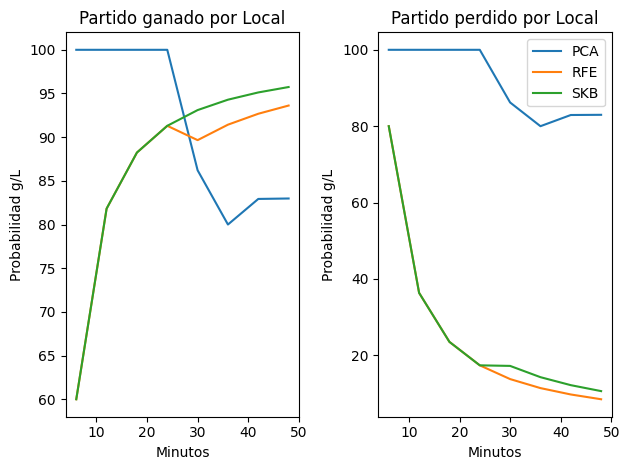

In [61]:
# Grafico con diferencia entre un partido ganando y uno perdido
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2 )
# Grafico ganado
ax1.plot(comparison_df['Minutes'], comparison_df['PCA_win'], label='PCA')
ax1.plot(comparison_df['Minutes'], comparison_df['RFE_win'], label='RFE')
ax1.plot(comparison_df['Minutes'], comparison_df['SKB_win'], label='SKB')
ax.legend()
ax1.set_xlabel('Minutos')
ax1.set_ylabel('Probabilidad g/L')
ax1.set_title('Partido ganado por Local')
# Gráfico perdido
ax2.plot(comparison_df['Minutes'], comparison_df['PCA_lose'], label='PCA')
ax2.plot(comparison_df['Minutes'], comparison_df['RFE_lose'], label='RFE')
ax2.plot(comparison_df['Minutes'], comparison_df['SKB_lose'], label='SKB')
ax2.legend()
ax2.set_xlabel('Minutos')
ax2.set_ylabel('Probabilidad g/L')
ax2.set_title('Partido perdido por Local')
# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En la grafica anterior , si utilizamos datos del partido en tiempo real, se puede verificar algunas conclusiones de cada modelo:

**El modelo que se entreno utilizando el "feature selection" por PCA , tiene un sesgo de ganar el partido**

**Los modelos que se entrenaron utilizando el "feature selection" por RFE y SKB , tienen una desicion mas real de lo que sucede en el partido**

De esta manera , se deberia concluir que **los modelos apropiados serian el entrenado por RFE y por SKB** . Para poder continuar con el proyecto se tomara como objetivo de desicion el valor promedio entre ambos modelos

In [62]:
#Promedio entre ambos modelos
comparison_df['Combinated_model_win'] = (comparison_df['RFE_win']+comparison_df['SKB_win'])/2
comparison_df['Combinated_model_lose'] = (comparison_df['RFE_lose']+comparison_df['SKB_lose'])/2
comparison_df

,Minutes,PCA_win,PCA_lose,RFE_win,RFE_lose,SKB_win,SKB_lose,Combinated_model_win,Combinated_model_lose
0,6,100.00,100.00,60.00,80.00,60.00,80.00,60.00,80.000
1,12,100.00,100.00,81.82,36.36,81.82,36.36,81.82,36.360
2,18,100.00,100.00,88.24,23.53,88.24,23.53,88.24,23.530
3,24,100.00,100.00,91.30,17.39,91.30,17.39,91.30,17.390
4,30,86.21,86.21,89.66,13.79,93.10,17.24,91.38,15.515
5,36,80.00,80.00,91.43,11.43,94.29,14.29,92.86,12.860
6,42,82.93,82.93,92.68,9.76,95.12,12.20,93.90,10.980
7,48,82.98,82.98,93.62,8.51,95.74,10.64,94.68,9.575


# Calculo de la variable Target

La fórmula de las probabilidades implícitas se establece de la siguiente manera:

    'K = 1 / p'

Donde 'p' es la probabilidad de que un equipo gane , expresada como un número decimal entre 0 y 1.

Por ejemplo, si la probabilidad de que un equipo gane es del 60%, la cuota sería de 1 / 0.6 = 1.67. Esto trae un problema a la hora de usarlo con probabilidades extremas , ya que los numeros son demasiado chicos si tienen gran probabilidad de ganar o son demasiado grande si la probabilidad es muy chica (verdadero problema). Por lo tanto , actualizaremos haremos el codigo de manera que se limiten los valores de cuota a 2 cuando la probabilidad es minima. De esta manera quedaria:

In [63]:
# En base a la explicacion del ultimo parrafo, establecemos la variable de cuota 'K' y la posibilidad durante el partido
K_win=[]
K_win.insert(0,100/(comparison_df.loc[comparison_df['Minutes'] == 6 , 'Combinated_model_win'].item()))
K_win.insert(1,100/(comparison_df.loc[comparison_df['Minutes'] == 12 , 'Combinated_model_win'].item()))
K_win.insert(2,100/(comparison_df.loc[comparison_df['Minutes'] == 18 , 'Combinated_model_win'].item()))
K_win.insert(3,100/(comparison_df.loc[comparison_df['Minutes'] == 24 , 'Combinated_model_win'].item()))
K_win.insert(4,100/(comparison_df.loc[comparison_df['Minutes'] == 30 , 'Combinated_model_win'].item()))
K_win.insert(5,100/(comparison_df.loc[comparison_df['Minutes'] == 36 , 'Combinated_model_win'].item()))
K_win.insert(6,100/(comparison_df.loc[comparison_df['Minutes'] == 42 , 'Combinated_model_win'].item()))
K_win.insert(7,100/(comparison_df.loc[comparison_df['Minutes'] == 48 , 'Combinated_model_win'].item()))
print('La variable de cuota para el partido en el minuto 6 es: ', round(K_win[0],3))
print('La variable de cuota para el partido en el minuto 12 es: ', round(K_win[1],3))
print('La variable de cuota para el partido en el minuto 18 es: ', round(K_win[2],3))
print('La variable de cuota para el partido en el minuto 24 es: ', round(K_win[3],3))
print('La variable de cuota para el partido en el minuto 30 es: ', round(K_win[4],3))
print('La variable de cuota para el partido en el minuto 36 es: ', round(K_win[5],3))
print('La variable de cuota para el partido en el minuto 42 es: ', round(K_win[6],3))
print('La variable de cuota para el partido en el minuto 48 es: ', round(K_win[7],3))

La variable de cuota para el partido en el minuto 6 es:  1.667
La variable de cuota para el partido en el minuto 12 es:  1.222
La variable de cuota para el partido en el minuto 18 es:  1.133
La variable de cuota para el partido en el minuto 24 es:  1.095
La variable de cuota para el partido en el minuto 30 es:  1.094
La variable de cuota para el partido en el minuto 36 es:  1.077
La variable de cuota para el partido en el minuto 42 es:  1.065
La variable de cuota para el partido en el minuto 48 es:  1.056


In [64]:
# En base a la explicacion del ultimo parrafo, establecemos la variable de cuota 'K' y la posibilidad durante el partido
K_lose=[]
K_lose.insert(0,100/(comparison_df.loc[comparison_df['Minutes'] == 6 , 'Combinated_model_lose'].item()))
K_lose.insert(1,100/(comparison_df.loc[comparison_df['Minutes'] == 12 , 'Combinated_model_lose'].item()))
K_lose.insert(2,100/(comparison_df.loc[comparison_df['Minutes'] == 18 , 'Combinated_model_lose'].item()))
K_lose.insert(3,100/(comparison_df.loc[comparison_df['Minutes'] == 24 , 'Combinated_model_lose'].item()))
K_lose.insert(4,100/(comparison_df.loc[comparison_df['Minutes'] == 30 , 'Combinated_model_lose'].item()))
K_lose.insert(5,100/(comparison_df.loc[comparison_df['Minutes'] == 36 , 'Combinated_model_lose'].item()))
K_lose.insert(6,100/(comparison_df.loc[comparison_df['Minutes'] == 42 , 'Combinated_model_lose'].item()))
K_lose.insert(7,100/(comparison_df.loc[comparison_df['Minutes'] == 48 , 'Combinated_model_lose'].item()))
print('La variable de cuota para el partido en el minuto 6 es: ', round(K_lose[0],3))
print('La variable de cuota para el partido en el minuto 12 es: ', round(K_lose[1],3))
print('La variable de cuota para el partido en el minuto 18 es: ', round(K_lose[2],3))
print('La variable de cuota para el partido en el minuto 24 es: ', round(K_lose[3],3))
print('La variable de cuota para el partido en el minuto 30 es: ', round(K_lose[4],3))
print('La variable de cuota para el partido en el minuto 36 es: ', round(K_lose[5],3))
print('La variable de cuota para el partido en el minuto 42 es: ', round(K_lose[6],3))
print('La variable de cuota para el partido en el minuto 48 es: ', round(K_lose[7],3))

La variable de cuota para el partido en el minuto 6 es:  1.25
La variable de cuota para el partido en el minuto 12 es:  2.75
La variable de cuota para el partido en el minuto 18 es:  4.25
La variable de cuota para el partido en el minuto 24 es:  5.75
La variable de cuota para el partido en el minuto 30 es:  6.445
La variable de cuota para el partido en el minuto 36 es:  7.776
La variable de cuota para el partido en el minuto 42 es:  9.107
La variable de cuota para el partido en el minuto 48 es:  10.444


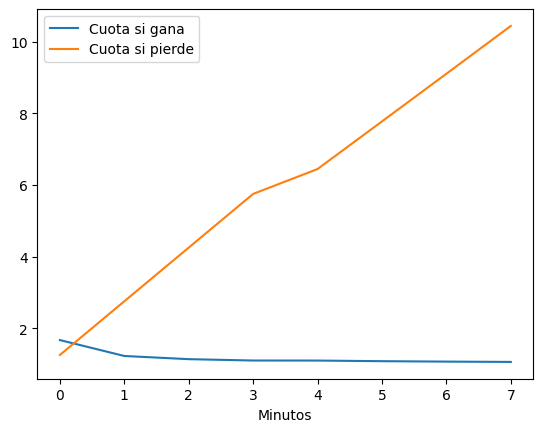

In [65]:
# Graficar las diferencias entre las cuotas
fig, ax = plt.subplots()
ax.plot(K_win, label='Cuota si gana')
ax.plot(K_lose, label='Cuota si pierde')
ax.legend()
ax.set_xlabel('Minutos')
plt.show()

Finalmente , se demuestra que la cuota puede ser un sistema automatizado en el cual el modelo predice una buena aproximacion para el final del mismo. Asi mismo es posible probarlo con cualquier tipo de arreglo que contenga esta informacion minuto a minuto. 

Hay que recordar que en los sistemas de apuestas , existen muchas intervenciones desde la misma plataforma , como el *"payout"* , los *"Overround"*, y tambien los participantes en la misma. Por lo tanto , una cuota alta o cuota baja no representa la ganancia que tendra cada participante , este valor representa mejor la distribucion de la apuesta ganadora entre los participantes.